**Akshat Aggarwal**

**E22CSEU0020**

**Question:-1**

In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Loading the dataset
df = pd.read_csv("air-quality-india.csv")

In [3]:
df.head()

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50


In [4]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  36192 non-null  object 
 1   Year       36192 non-null  int64  
 2   Month      36192 non-null  int64  
 3   Day        36192 non-null  int64  
 4   Hour       36192 non-null  int64  
 5   PM2.5      36192 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ MB


In [5]:
# Preprocessing the data
daily_avg_pm25 = df.groupby('Timestamp')['PM2.5'].mean().reset_index()

In [6]:
# Handling missing values
print("Missing Values:\n", df.isnull().sum())  # Check for null values
df['PM2.5'] = df['PM2.5'].fillna(method='ffill')  # Forward-fill missing PM2.5 values

Missing Values:
 Timestamp    0
Year         0
Month        0
Day          0
Hour         0
PM2.5        0
dtype: int64


In [7]:
# Verifying the data type of PM2.5
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')

In [8]:
df.describe

<bound method NDFrame.describe of                  Timestamp  Year  Month  Day  Hour   PM2.5
0      2017-11-07 12:00:00  2017     11    7    12   64.51
1      2017-11-07 13:00:00  2017     11    7    13   69.95
2      2017-11-07 14:00:00  2017     11    7    14   92.79
3      2017-11-07 15:00:00  2017     11    7    15  109.66
4      2017-11-07 16:00:00  2017     11    7    16  116.50
...                    ...   ...    ...  ...   ...     ...
36187  2022-06-04 11:00:00  2022      6    4    11   35.89
36188  2022-06-04 12:00:00  2022      6    4    12   33.83
36189  2022-06-04 13:00:00  2022      6    4    13   33.05
36190  2022-06-04 14:00:00  2022      6    4    14   35.29
36191  2022-06-04 15:00:00  2022      6    4    15   40.67

[36192 rows x 6 columns]>

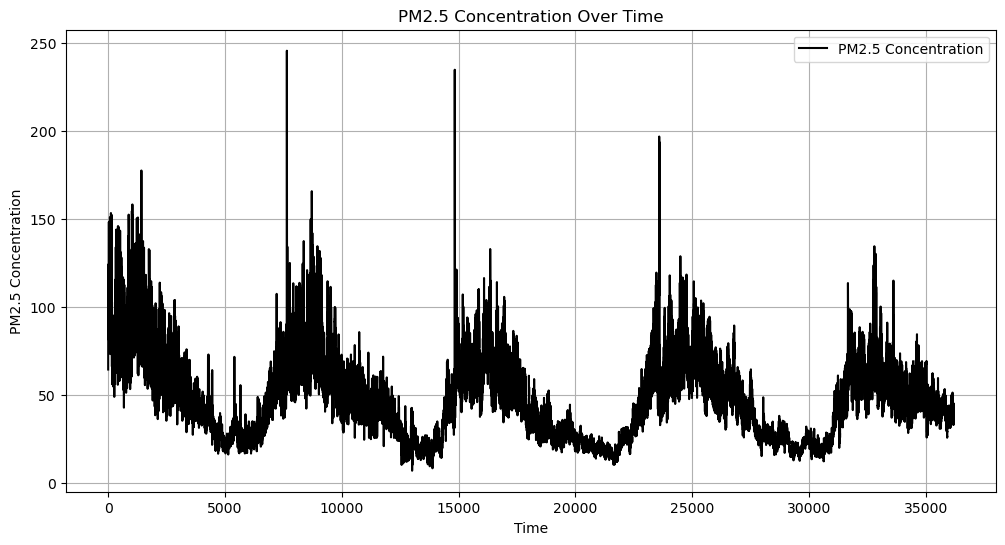

In [9]:
#Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(df['PM2.5'], label='PM2.5 Concentration', color='black')
plt.title('PM2.5 Concentration Over Time')
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.grid()
plt.show()

**Question:-2**

In [10]:
#Performing ADF test
result_adf = adfuller(df['PM2.5'])
print("ADF Test Statistic:", result_adf[0])
print("p-value:", result_adf[1])
print("Critical Values:", result_adf[4])

if result_adf[1] < 0.05:
    print("The data is stationary.")
else:
    print("The data is non-stationary.")

ADF Test Statistic: -5.168240225624006
p-value: 1.0204174858158493e-05
Critical Values: {'1%': -3.430530966421994, '5%': -2.8616199827658604, '10%': -2.566812572298683}
The data is stationary.


**Question:-3**

In [11]:
#Performing KPSS test
result_kpss = kpss(df['PM2.5'], regression='c')
print("KPSS Test Statistic:", result_kpss[0])
print("p-value:", result_kpss[1])
print("Critical Values:", result_kpss[3])

if result_kpss[1] < 0.05:
    print("The data is non-stationary.")
else:
    print("The data is stationary.")


KPSS Test Statistic: 2.536482341952714
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The data is non-stationary.


C:\Users\akagg\AppData\Local\Temp\ipykernel_15632\2079055301.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(df['PM2.5'], regression='c')


**Question:-4**

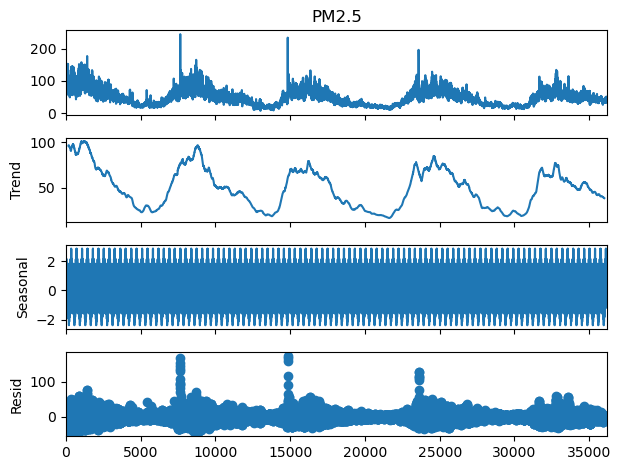

In [12]:
decompose_result = seasonal_decompose(df['PM2.5'], model='additive', period=365)
# Plot decomposition
decompose_result.plot()
plt.show()

**Question:-5**

In [13]:
# Test stationarity of the trend
adf_trend = adfuller(decompose_result.trend.dropna())
print("ADF Test on Trend Component:", adf_trend[1])

# Test stationarity of the residuals
adf_resid = adfuller(decompose_result.resid.dropna())
print("ADF Test on Residual Component:", adf_resid[1])

ADF Test on Trend Component: 0.06855803365818443
ADF Test on Residual Component: 0.0


**Question:-6**

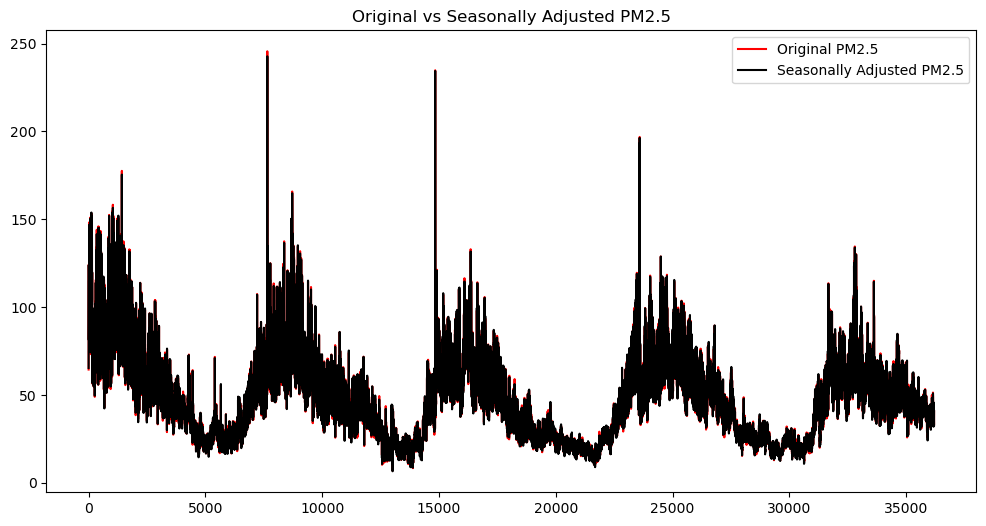

In [14]:
seasonally_adjusted = df['PM2.5'] - decompose_result.seasonal
# Plot original vs seasonally adjusted series
plt.figure(figsize=(12, 6))
plt.plot(df['PM2.5'], label='Original PM2.5', color='red')
plt.plot(seasonally_adjusted, label='Seasonally Adjusted PM2.5', color='black')
plt.title('Original vs Seasonally Adjusted PM2.5')
plt.legend()
plt.show()

**Question:-7**

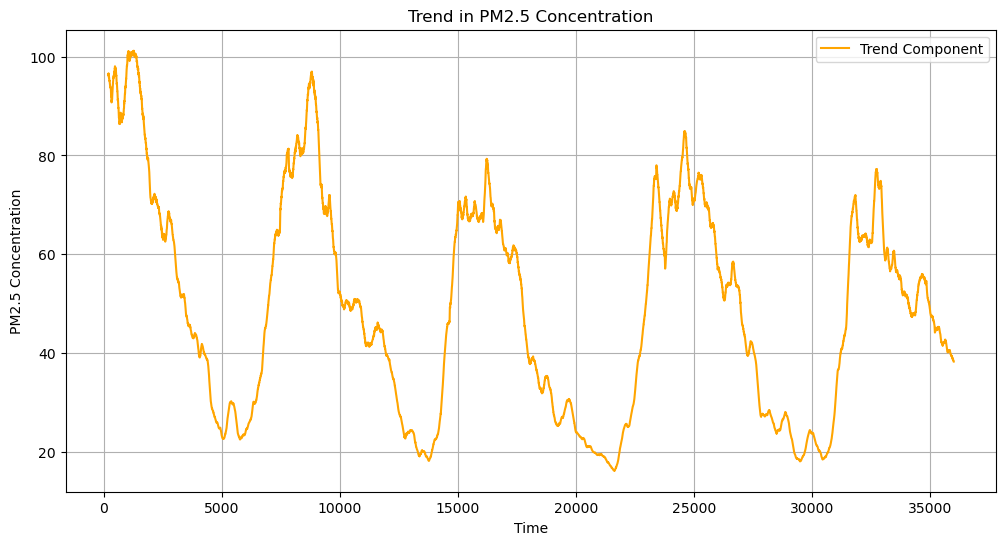

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(decompose_result.trend, label='Trend Component', color='orange')
plt.title('Trend in PM2.5 Concentration')
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.grid()
plt.show()

**Question:-8**

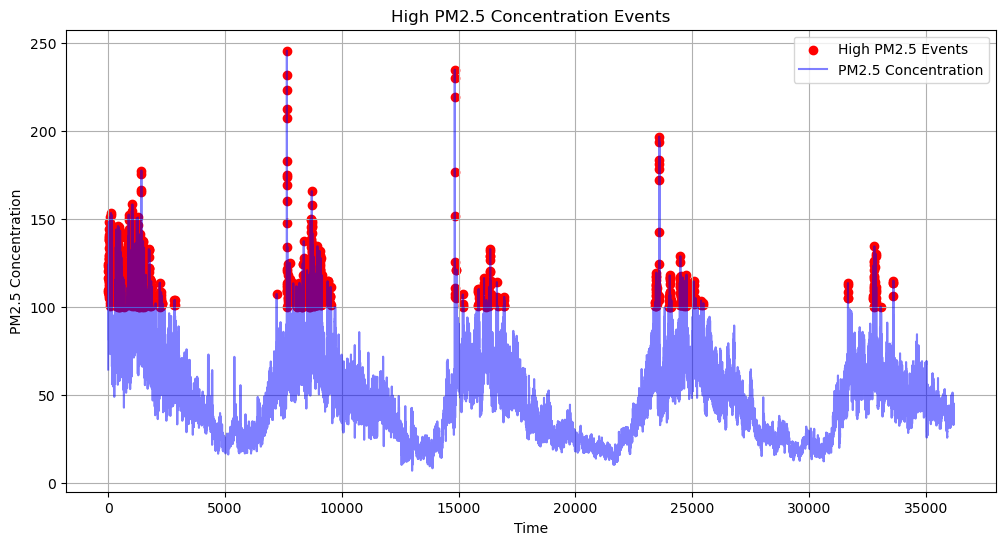

In [16]:
high_pm25 = df[df['PM2.5'] > 100]

plt.figure(figsize=(12, 6))
plt.scatter(high_pm25.index, high_pm25['PM2.5'], color='red', label='High PM2.5 Events')
plt.plot(df['PM2.5'], label='PM2.5 Concentration', color='blue', alpha=0.5)
plt.title('High PM2.5 Concentration Events')
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.grid()
plt.show()
